# Dataset Preview

## Loading Markdown Files

In [1]:
from pathlib import Path
import sys
import os
import textwrap

sys.path.append(os.path.join(os.getcwd(), ".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.load_data import load_markdown_files

sns.set(style="whitegrid")

docs = load_markdown_files("../data/raw")
print(f"Loaded {len(docs)} markdown files.")

def summarize_doc(doc):
    text = doc.get("text", "")
    words = text.split()
    return {
        "filename": doc.get("filename"),
        "word_count": len(words),
        "char_count": len(text),
        "preview": textwrap.shorten(text.replace("\n", " "), width=200, placeholder="...")
    }

summary_data = [summarize_doc(doc) for doc in docs]
summary_df = pd.DataFrame(summary_data)
summary_df

Loaded 5 markdown files.


,filename,word_count,char_count,preview
0,football_rules.md,1712,11647,# Comprehensive Overview of Football (Soccer) ...
1,football_tactics.md,1113,8394,# The Evolution of Football Tactics ## Early T...
2,sprinting_mechanics.md,975,6244,# Layered Dynamics of Sprinting Mechanics ## A...
3,training_periodization.md,1671,12550,"# Strength Training Periodization: Concepts, M..."
4,volleyball_rules.md,1720,11416,# Comprehensive Overview of Volleyball Rules: ...


## Basic Statistics

In [2]:
word_counts = summary_df["word_count"]
char_counts = summary_df["char_count"]

stats = {
    "average_words": word_counts.mean(),
    "average_chars": char_counts.mean(),
    "max_words": word_counts.max(),
    "min_words": word_counts.min(),
    "max_chars": char_counts.max(),
    "min_chars": char_counts.min(),
    "longest_doc": summary_df.loc[word_counts.idxmax(), "filename"] if not summary_df.empty else None,
    "shortest_doc": summary_df.loc[word_counts.idxmin(), "filename"] if not summary_df.empty else None,
}
stats

{'average_words': np.float64(1438.2),
 'average_chars': np.float64(10050.2),
 'max_words': np.int64(1720),
 'min_words': np.int64(975),
 'max_chars': np.int64(12550),
 'min_chars': np.int64(6244),
 'longest_doc': 'volleyball_rules.md',
 'shortest_doc': 'sprinting_mechanics.md'}

## Visualization

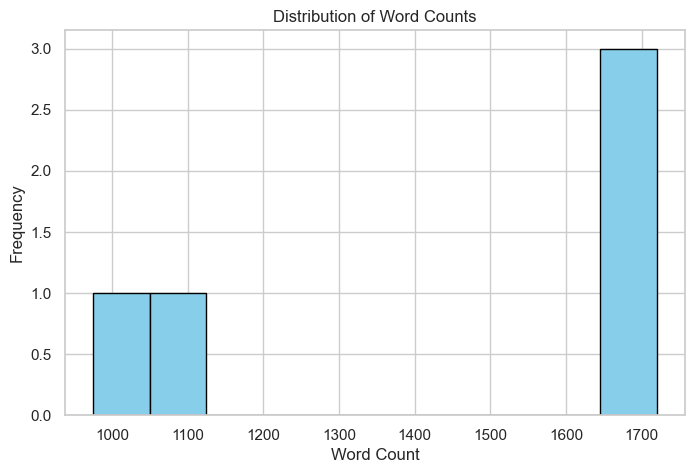

In [3]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.hist(word_counts, bins=10, color="skyblue", edgecolor="black")
ax.set_xlabel("Word Count")
ax.set_ylabel("Frequency")
ax.set_title("Distribution of Word Counts")
plt.show()

## Data Quality Checks

In [4]:
warnings = []

short_docs = summary_df[summary_df["word_count"] < 100]
if not short_docs.empty:
    warnings.append(f"Found {len(short_docs)} short documents (<100 words)")

empty_docs = summary_df[summary_df["word_count"] == 0]
if not empty_docs.empty:
    warnings.append(f"Found {len(empty_docs)} empty documents")

hashes = summary_df["preview"].apply(hash)
duplicate_hashes = hashes[hashes.duplicated(keep=False)]
if not duplicate_hashes.empty:
    warnings.append("Potential duplicate content detected")

warnings if warnings else ["No major issues detected."]

['No major issues detected.']

## Sample Documents

In [8]:
from IPython.display import Markdown, display

for doc in docs[:1]:
    display(Markdown(f"### {doc['filename']}"))
    display(Markdown(doc.get("text", "")))

### football_rules.md

# Comprehensive Overview of Football (Soccer) Rules: Structure, Gameplay, and Interpretations

## Introduction: The Logic and Governance of Football Laws
Football (known as soccer in some countries) is governed globally by the **Laws of the Game**, maintained by **IFAB (International Football Association Board)**. These laws standardize gameplay structure, player conduct, officiating procedures, and match environments. Although the rules appear universal, subtle differences exist among leagues—such as VAR implementation details, substitution allowances, or timekeeping interpretations. These small variations illustrate the rule set’s adaptability rather than contradiction.

This document provides an expert-level explanation of modern football rules, exploring layered rule dependencies, interpretations, and practical implications in competitive contexts. It is structured to support deep understanding, making it suitable for analysts, coaches, referees, and advanced fans.

---

## The Field of Play: Dimensions, Markings, and Equipment Standards

### **Pitch Dimensions**
Football fields are rectangular and vary slightly depending on competition level. According to IFAB:
- **Length:** 100–110 m (international: 100–105 m)
- **Width:** 64–75 m (international: 64–68 m)

The relatively narrow international range promotes uniform tactical expectations across major competitions.

### **Pitch Markings**
Standard markings include:
- **Halfway line**  
- **Center circle** (radius: 9.15 m)  
- **Penalty area** (16.5 m from each post, 16.5 m deep)  
- **Goal area** (5.5 m from each post, 5.5 m deep)  
- **Penalty spot** (11 m from goal line)  
- **Corner arcs** (radius: 1 m)

All lines are part of the areas they define. Minor inconsistencies in turf thickness or field texture can influence ball movement, but they do not alter rules.

### **Goalposts and Nets**
Goals measure:
- **Width:** 7.32 m  
- **Height:** 2.44 m  

Although fixed worldwide, materials vary: steel, aluminum, or hybrid structures. Net tension and depth differ across stadiums but must not interfere with play.

### **The Ball**
Regulated characteristics:
- **Circumference:** 68–70 cm  
- **Weight:** 410–450 g  
- **Pressure:** 0.6–1.1 atm  

Some competitions experiment with slightly softer match balls for colder conditions, but within legal limits.

---

## Players, Roles, and Substitutions

### **Team Composition**
A match consists of:
- **11 players per team**
- Including **1 goalkeeper**  
- **Up to 12 substitutes** (varies by competition)

At least seven players are required to start a match. If a team drops below seven due to injuries or dismissals, the referee may abandon the match.

### **Player Roles and Restrictions**
- **Goalkeeper:** Only player allowed to use hands inside their own penalty area.  
- **Outfield players:** Must use anything except arms/hands to play the ball.

### **Substitutions**
Modern football typically allows:
- **Three to five substitutions** depending on the competition.  
- An additional substitution in extra time in many tournaments.  

Substituted players cannot return. Some friendly formats or youth leagues allow rolling substitutions.

Players must enter and exit at the halfway line unless instructed otherwise for safety.

---

## Match Duration, Timekeeping, and Restarts

### **Duration**
A standard match consists of:
- **Two 45-minute halves**  
- **Halftime interval of up to 15 minutes**

### **Added Time (Stoppage Time)**
Referees add time for:
- Substitutions  
- Injuries  
- VAR reviews  
- Time-wasting  
- Significant delays

Typical added time ranges from 1–5 minutes, though recent competitions have seen larger values (e.g., 8–12 minutes) due to stricter enforcement of active-play expectations.

### **Extra Time**
Knockout matches may require:
- **Two 15-minute periods**  
- Followed by penalty shootout if still tied

### **Kick-offs**
Kick-off starts each half and follows goals scored. The ball can move in any direction.

---

## Ball In and Out of Play: Core Restart Logic

The ball is **out of play** when:
- It fully crosses touchline or goal line  
- The referee stops play  

It remains **in play** if:
- It rebounds off goalposts  
- It contacts the referee (unless possession changes or leads to a goal-scoring opportunity)  

This referee-contact rule was updated recently; previously, play continued regardless.

### **Types of Restarts**
1. **Throw-in**  
2. **Goal kick**  
3. **Corner kick**  
4. **Free kick** (direct or indirect)  
5. **Penalty kick**  
6. **Dropped ball**

Dropped-ball procedures changed significantly in recent years, now giving uncontested restarts.

---

## Fouls, Misconduct, and Disciplinary Actions

### **Direct Free Kick Offenses**
Include:
- Kicking or attempting to kick an opponent  
- Tripping, charging, striking  
- Holding or pushing  
- Handball (deliberate)

A direct free kick may lead to a penalty if inside the defending penalty area.

### **Indirect Free Kick Offenses**
Include:
- Dangerous play without contact  
- Impeding the opponent  
- Goalkeeper handling back-passes  
- Offside penalties  

Indirect free kicks require the ball to touch another player before a goal can be scored.

### **Handball Clarifications**
Modern interpretations consider:
- **Deliberate action**  
- **Arm in unnatural position**  
- **Body silhouette enlargement**

Slight differences in referee strictness lead to natural interpretation inconsistencies.

---

## Disciplinary Actions

### **Yellow Card**
Given for:
- Unsporting behavior  
- Persistent infringement  
- Delaying restarts  
- Dissent  

Two yellows = **red card**.

### **Red Card**
Given for:
- Serious foul play  
- Violent conduct  
- Denying obvious goal-scoring opportunity  
- Spitting  
- Offensive or abusive language  

A dismissed player cannot be replaced; team plays with fewer players.

---

## Offside Rule: Interpretation and Tactical Impact

The offside law is one of the most nuanced rules.

### **Offside Position**
A player is in an offside position if:
- Any part of head, body, or feet is nearer to opponent’s goal line
- Than both the ball and second-last defender

Arms do NOT count for offside detection.

### **Offside Offense**
A player is penalized only if involved in active play:
- Interfering with play  
- Interfering with an opponent  
- Gaining advantage from offside position  

Being in an offside position alone is not an offense.

Minor interpretation differences occur when judging “interfering with an opponent,” especially with sight-lines or impact on defenders.

---

## Penalty Kicks: Structure and Infringements

A penalty is awarded for certain direct-free-kick fouls inside the box. Key rules:

### **Taking the Penalty**
- Ball is placed on penalty spot  
- Only designated taker may shoot  
- All players except goalkeeper and kicker must be outside penalty area and arc  
- Goalkeeper must have at least one foot on or in line with the goal line at the moment of kick  

Some competitions interpret “in line” as the foot being parallel to the line; others allow it to be slightly behind.

### **Infringements**
If:
- Attacker infringes → indirect free kick if goal scored; retake if missed  
- Defender infringes → retake if attacker misses; goal stands if scored  
- Both infringe → retake  

---

## Throw-Ins, Corner Kicks, and Goal Kicks

### **Throw-in**
- Awarded when ball crosses touchline  
- Player must throw from behind head with both hands, feet on or behind the line  
- Foul throws result in turnover  

While rules are strict, enforcement varies slightly by referee.

### **Corner Kick**
Awarded when defenders last touch the ball before it crosses goal line (not scoring).

Opponents must remain 9.15 m from corner arc.

### **Goal Kick**
Taken from anywhere within the goal area.  
Opponents must stay outside the penalty area until ball is in play.

Updated rules allow the ball to be played before exiting the box—previously it had to leave the penalty area first.

---

## Free Kicks: Direct, Indirect, and Quick Restarts

### **Direct Free Kick**
A goal may be scored directly.  
Taken from the spot where foul occurred.

### **Indirect Free Kick**
Referee signals with raised arm.  
Requires second-player contact before goal is awarded.

### **Quick Free Kicks**
Teams may restart quickly without waiting for wall setup unless the referee intervenes.

If attackers choose to restart quickly:
- Defenders may intercept  
- The referee cannot caution a defender for failing to retreat unless restart is ceremonial  

---

## Goalkeeper Rules: Handling, Time Management, and Restrictions

### **Handling Restrictions**
Goalkeepers may:
- Handle the ball inside their penalty area  
- Not handle deliberate back-passes  
- Not handle throw-ins from teammates  

### **Six-Second Rule**
Goalkeepers should release ball within six seconds of control.  
While widely cited, enforcement differs: some referees allow 7–9 seconds depending on context.

### **Double Touch**
Goalkeepers cannot handle the ball again after releasing it unless another player touches it.

---

## Advantage, Intent, and Referee Authority

### **Advantage Rule**
Referee may allow play to continue after a foul if the attacking team benefits.  
Advantage must materialize within a few seconds; otherwise, play is brought back.

### **Referee Authority**
The referee’s decision is final regarding facts connected with play.  
VAR can advise but cannot override without referee confirmation.

---

## VAR (Video Assistant Referee): Scope and Limitations

VAR reviews:
1. **Goal situations**  
2. **Penalty decisions**  
3. **Direct red cards**  
4. **Mistaken identity**

VAR does not decide routine fouls or non-critical issues.  
Different leagues apply VAR with varying thresholds—e.g., “clear and obvious error” interpreted more strictly in some competitions.

---

## Conduct, Sportsmanship, and Time-Wasting

Players and staff must comply with:
- Respect for opponents  
- Respect for referees  
- No simulation (diving)  
- No excessive celebrations or removal of shirts  

Time-wasting actions include:
- Delayed restarts  
- Feigned injury  
- Excessively slow substitutions  

Officials increasingly enforce sanctions to maintain match tempo.

---

## Special Situations: Drop Balls, Bounced Balls, and Unusual Incidents

### **Dropped Ball (Modern Procedure)**
If play stops for reasons unrelated to a foul:
- Ball is given to the team last in possession  
- Opponents must stay 4 m away  

This eliminates contested dropped balls of past decades.

### **Ball Hitting Referee**
If ball contacts referee and:
- Leads to change of possession  
- Creates a promising attack  
- Results in a goal  

→ A dropped ball restart is awarded.

### **Outside Interference**
Match is stopped if:
- Extra balls enter field  
- Spectators disrupt play  
- Animals or drones interfere  

Restart depends on situation.

---

## Conclusion: Football Rules as a Complex but Coherent System
The Laws of the Game create a structured playing environment balancing fairness, flow, and athletic integrity. While globally standardized, slight variations in competition-specific interpretations—such as VAR protocols, substitution limits, or goalkeeper handling enforcement—add subtle complexity without altering core principles.

Football’s rules continue evolving, often in response to tactical innovations, technological advances, and fairness considerations. A detailed understanding reveals that the sport’s regulatory framework is not static but an actively managed system reflecting the interplay between tradition and modern demands.


## Export Metadata

In [6]:
results_dir = Path("../results")
results_dir.mkdir(parents=True, exist_ok=True)
metadata_df = summary_df[["filename", "word_count", "char_count"]]
metadata_path = results_dir / "dataset_overview.csv"
metadata_df.to_csv(metadata_path, index=False)
print(f"Saved dataset metadata to {metadata_path}")

Saved dataset metadata to ..\results\dataset_overview.csv
